Initial price of the 5-year ZCB: 0.9488


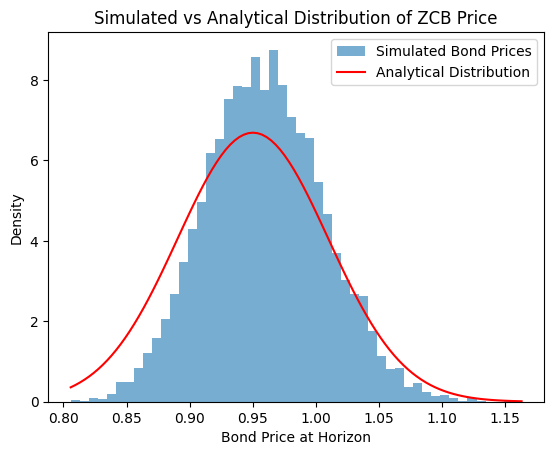

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Vasicek Model
kappa = 0.1      # Mean-reversion speed
theta = 0.03     # Long-term mean of interest rate
sigma = 0.02     # Volatility of short rate
r0 = 0.02        # Initial short rate
T = 5            # Maturity of ZCB in years
horizon = 1      # Simulation horizon in years
n_simulations = 10000  # Number of simulations
dt = 1/252       # Daily time step

# Analytical bond price at t=0
def zero_coupon_bond_price(r, T, kappa, theta, sigma, t=0):
    B = (1 - np.exp(-kappa * (T - t))) / kappa
    A = (theta - (sigma**2) / (2 * kappa**2)) * (B - (T - t)) - (sigma**2) * B**2 / (4 * kappa)
    return np.exp(-A - B * r)

P_0 = zero_coupon_bond_price(r0, T, kappa, theta, sigma)
print(f"Initial price of the 5-year ZCB: {P_0:.4f}")

# Simulating the evolution of interest rates
def simulate_vasicek(r0, kappa, theta, sigma, T, dt, n_simulations):
    n_steps = int(T / dt)
    rates = np.zeros((n_steps, n_simulations))
    rates[0, :] = r0
    for t in range(1, n_steps):
        dr = kappa * (theta - rates[t-1, :]) * dt + sigma * np.sqrt(dt) * np.random.normal(size=n_simulations)
        rates[t, :] = rates[t-1, :] + dr
    return rates

# Simulate rates over the horizon
rates = simulate_vasicek(r0, kappa, theta, sigma, horizon, dt, n_simulations)
r_horizon = rates[-1, :]

# Compute bond prices at the horizon
P_horizon = zero_coupon_bond_price(r_horizon, T - horizon, kappa, theta, sigma, t=horizon)

# Analytical distribution of the bond price
mean_r = theta + (r0 - theta) * np.exp(-kappa * horizon)
var_r = (sigma**2 / (2 * kappa)) * (1 - np.exp(-2 * kappa * horizon))
std_r = np.sqrt(var_r)

B_horizon = (1 - np.exp(-kappa * (T - horizon))) / kappa
A_horizon = (theta - (sigma**2) / (2 * kappa**2)) * (B_horizon - (T - horizon)) - (sigma**2) * B_horizon**2 / (4 * kappa)
mean_P = np.exp(-A_horizon - B_horizon * mean_r)
std_P = np.abs(B_horizon * std_r * mean_P)  # Approximation via delta method

# Plotting the results
plt.hist(P_horizon, bins=50, density=True, alpha=0.6, label='Simulated Bond Prices')
x = np.linspace(P_horizon.min(), P_horizon.max(), 100)
pdf = norm.pdf(x, loc=mean_P, scale=std_P)
plt.plot(x, pdf, label='Analytical Distribution', color='red')
plt.xlabel('Bond Price at Horizon')
plt.ylabel('Density')
plt.legend()
plt.title('Simulated vs Analytical Distribution of ZCB Price')
plt.show()
